# Lab 2 - Classification, vectorization, neural networks, experimental design
### SENG 474/503
### Jan 27th, 2023
### TA: Jonas Buro

# Linear Classification
Recall that a linear classifier is a function which attempts to identify which class an object belongs to based on its characteristics (features).

Compare this with linear regression, where the goal is to predict a scalar valued target.

Consider the case of binary linear classification; wherein one is interested in classifying data into one of two classes.

Let's start by generating a linearly seperable dataset, and then training a classifier for it.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

The shape of the data: (30000, 2)


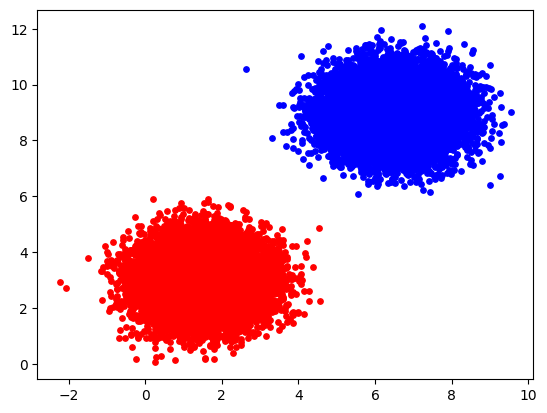

In [2]:
from sklearn.datasets import make_blobs

# Create two isotropic Gaussian distributions with different centers and plot them
num_samples = 30000
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
samples, labels = make_blobs(n_samples=num_samples, 
                            n_features=2,
                            centers=([1.5, 3], [6.5, 9]), 
                            random_state=0,
                            cluster_std=0.8)
                            
print(f"The shape of the data: {samples.shape}")

# Plot the data
colours = ('red', 'blue')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
_, ax = plt.subplots()
for n_class in np.unique(labels):
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    ax.scatter(samples[labels==n_class][:,0],  # x : select the first column of the sample rows for which the corresponding index in labels == n_class 
                samples[labels==n_class][:,1], # y : select the second column of the sample rows for which the corresponding index in labels == n_class
                c=colours[n_class], 
                s=15)

# Aside: Python Vectorization
Vectorization in Python refers to using external array and array-based operations instead of python loops to perform mathematical transformations on data.
The advantage this provides is twofold; first, the code is more concise, and second the code executes much faster.
In the case of numpy, the code executes faster because the array-based operations are written and compiled in C. Numpy exposes this compiled C code via an API. At run-time, the Python interpreter passes arguments to the compiled C code, which performs the calculation and returns the result. Consider the following example, comparing the wall time of transforming an array using vectorization to transformation via a loop:

In [3]:
%%time 
# IPython / Jupyter Notebook magic command to measure execution time of a single cell

# Transforming an array using numpy 

# Generate a 1d array with evenly spaced values between 1, 100000
data = np.linspace(start=1, 
                    stop=100000, 
                    num=100000, 
                    dtype=int)

data = 2 * data # overloads '*' operator, equivalent to np.multiply(2, data), this performs an API call 

CPU times: user 0 ns, sys: 2.57 ms, total: 2.57 ms
Wall time: 1.87 ms


In [4]:
%%time
# Transforming an array using a python loop
for i in range(len(data)):
    data[i] *= 2

CPU times: user 21.8 ms, sys: 2.6 ms, total: 24.4 ms
Wall time: 23.7 ms


# Perceptron
Next, we are going to use the perceptron model to learn the separating hyperplane for the generated data. 

Recall that the perceptron is a binary predictor function parameterized by weights $w$, which combines these weights with the features of an input vector $x$ to predict a binary output $y = sgn(w^{T}x)$. The weights are updated by an iterative process, which when fed a training sample, adjust the weights when a misclassification occurs. This process is equivalent to gradient descent with loss function ${L}(x_t) = max(0, -y_tw^{T}x_t)$. If the data is linearly seperable, then the perceptron is guaranteed to learn a separating hyperplane. Proof here: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html

The weights of the model are: [4.89274583 4.08152608]
The bias of the model is: -46.0
The train accuracy of the model: 100.0%
The test accuracy of the model: 100.0%


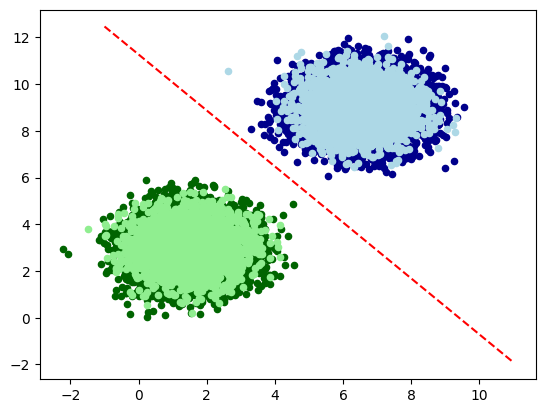

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
trainData, testData, trainLabels,testLabels = train_test_split(samples , labels , test_size = 0.2, random_state=0)

# Initialize the perceptron model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
clf = Perceptron(tol=1e-1)

# Train the perceptron using the perceptron learning algorithm
clf.fit(trainData,trainLabels)
print(f"The weights of the model are: {clf.coef_[0]}")
print(f"The bias of the model is: {clf.intercept_[0]}")


# Plot the train and test data
colours = ('darkgreen', 'darkblue')
_, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(trainData[trainLabels==n_class][:, 0],
                trainData[trainLabels==n_class][:, 1],
                c=colours[n_class],
                s=20)

colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(testData[testLabels==n_class][:, 0],
                testData[testLabels==n_class][:, 1],
                c=colours[n_class], 
                s=20)

# Plot decision boundary
w = clf.coef_[0]                            # weights
m = -w[0] / w[1]                            # slope of hyperplane (excercise - how is this calculated?)
y_int = clf.intercept_[0] / w[1]            # y_intercept of hyperplane
xx = np.linspace(-1,11)                     # x coordinates of hyperplane
yy = m * xx - y_int                         # corresponding y coordinates calculated via slope intercept form
plt.plot(xx, yy, '--', color='red')

print(f"The train accuracy of the model: {clf.score(trainData,trainLabels)*100}%")
print(f"The test accuracy of the model: {clf.score(trainData,trainLabels)*100}%")


# Non-linearly separable data
We'll now try to learn a separating hyperplane on non-linearly separable data. 

The train accuracy of the model: 48.75%
The test accuracy of the model: 48.75%


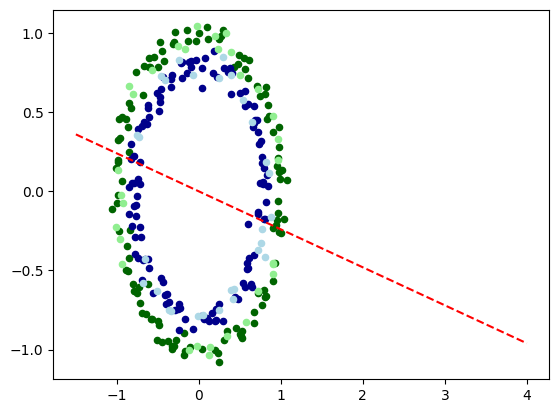

In [6]:
from sklearn.datasets import make_moons,make_circles

# Generate non linearly separable data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

# samples, labels = make_moons(n_samples=300, noise=0.1)
samples, labels = make_circles(n_samples=300, noise=0.05)

trainData, testData, trainLabels, testLabels = train_test_split(samples, labels, test_size=0.2)

clf = Perceptron(tol=1e-3)
clf.fit(trainData,trainLabels)

# Plot the train and test data
colours = ('darkgreen', 'darkblue')
_, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(trainData[trainLabels==n_class][:, 0],
                trainData[trainLabels==n_class][:, 1],
                c=colours[n_class],
                s=20)

colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(testData[testLabels==n_class][:, 0],
                testData[testLabels==n_class][:, 1],
                c=colours[n_class], 
                s=20)

# Plot decision boundary
w = clf.coef_[0]                            
b = clf.intercept_[0] / w[1]                
m = -w[0] / w[1]                            
xx = np.linspace(-1.5,4)                   
yy = m * xx - b                             
plt.plot(xx, yy, '--', color='red')

print(f"The train accuracy of the model: {clf.score(trainData,trainLabels)*100}%")
print(f"The test accuracy of the model: {clf.score(trainData,trainLabels)*100}%")

# Multi-layer Perceptron

The model we chose above does not have enough expressive power to classify the data. Notice that the trained classifier is unable to obtain high accuracy. This was obvious from the beginning: we were trying to model a non-linear boundary using a linear model. We will now use a multi-layer perceptron to classify the data, which is capable of expressing non-linear classification boundaries due to the incorporation of non-linear activation functions within the network architecture. More on this later..

MLP test accuracy: 93.33333333333333


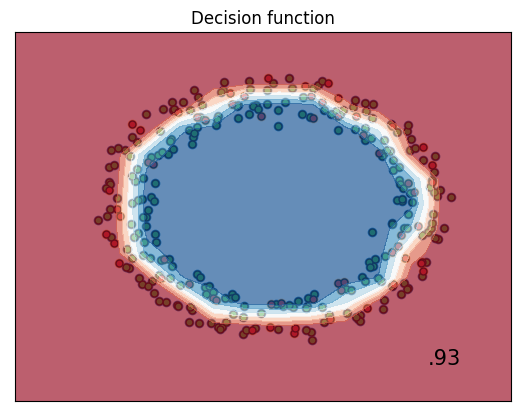

In [7]:
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

# Initialize our MLP 
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlp = MLPClassifier(hidden_layer_sizes=(40,10),
                    activation='relu', 
                    max_iter=2000, 
                    alpha=0.1,
                    solver='adam',
                    learning_rate_init=0.001, 
                    learning_rate='adaptive')

# Train our MLP using stochastic gradient descent
mlp.fit(trainData, trainLabels);

print(f"MLP test accuracy: {mlp.score(testData,testLabels)*100}")

# Plot results
# https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

h=0.2
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
x_min, x_max = samples[:, 0].min() - .5, samples[:, 0].max() + .5
y_min, y_max = samples[:, 1].min() - .5, samples[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
fig, ax = plt.subplots()
ax.scatter(trainData[:, 0], trainData[:, 1])
ax.scatter(testData[:, 0], testData[:, 1], alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

# argmax (single class) vs softmax (distribution over classes)
# see below cell for additional comments

Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] 
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=cm, alpha=.001)
ax.scatter(trainData[:, 0], trainData[:, 1],edgecolors='black', s=25)
ax.scatter(testData[:, 0], testData[:, 1], edgecolors='black', s=25)
name="Decision function"
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(name)
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % mlp.score(testData,testLabels)).lstrip('0'),size=15, horizontalalignment='right')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.67)
plt.show()

# Notes
In the example above, after training, the network will output a predicted class $\hat{y}$ for an input $x$. This corresponds to the neuron with the highest activation in the output layer when an example is fed through it. To score the test data, each sample $x_j$ in the test data set is fed through the network, a prediction $\hat{y_j}$ is made, and then comapred to the true label $y_j$. The number of misclassifcations are counted and then compared to the number of correct classifications to yield a score.

It is possible, however, to have the network output a probability distribution over possible classes. This is achieved by applying the softmax activation function on the final layer, which converts an $n$-vector $o$ of output layer activation values to an n-vector $p$ of values in $[0,1]$, where $\sum_{i=1}^{n} p_i = 1$. This probability distribution is used above to visualize the data.

Activation functions play a critical role in network behaviour, and should be covered in more detail during lectures. 

Here is a reference sheet for some popular activation functions: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

# Hand-written digit multi-class prediction:
The next section deals with training a model to classify hand written digits. Historically, solving this task was a major breakthrough in narrow AI and computer vision, and paved the way for the development of technologies which are in use today.

https://en.wikipedia.org/wiki/LeNet

<Figure size 640x480 with 0 Axes>

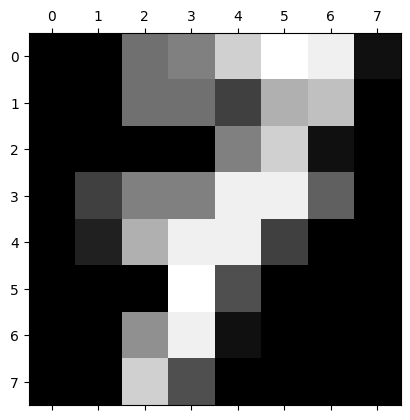

In [8]:
from sklearn.datasets import load_digits

images = load_digits()
plt.gray()
plt.matshow(images.images[7])
plt.show()

# Experiment

The following cell demonstrates a simple experiment in which the goal is to find a MLP which performs the best on the digit classification task.

First, the number of neurons in the hidden layer are varied. Next, the L2-regularization constant alpha is varied. Then the results are visualized.

This procedure is called hyperparameter tuning.

In [9]:
from sklearn import preprocessing

X_digits, y_digits = load_digits(return_X_y=True)
X_scaled = preprocessing.scale(X_digits)
trainData, testData, trainLabel, testLabel = train_test_split(X_scaled,y_digits,test_size=0.2)

# ======== Varying the number of neurons in the hidden layer

clf_1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_1.fit(trainData,trainLabel)
print(clf_1.score(trainData,trainLabel))
print("Accuracy of using 3 neurons in the hidden layer:%.4f"%clf_1.score(testData,testLabel))

clf_2 = MLPClassifier(hidden_layer_sizes=(7), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_2.fit(trainData,trainLabel)
print(clf_2.score(trainData,trainLabel))
print("Accuracy of using 7 neurons in the hidden layer:%.4f"%clf_2.score(testData,testLabel))


clf_3 = MLPClassifier(hidden_layer_sizes=(13), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_3.fit(trainData,trainLabel)
print(clf_3.score(trainData,trainLabel))
print("Accuracy of using 13 neurons in the hidden layer:%.4f"%clf_3.score(testData,testLabel))

clf_4 = MLPClassifier(hidden_layer_sizes=(21), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_4.fit(trainData,trainLabel)
print(clf_4.score(trainData,trainLabel))
print("Accuracy of using 21 neurons in the hidden layer:%.4f"%clf_4.score(testData,testLabel))

# ======== Varying alpha

clf_5 = MLPClassifier(hidden_layer_sizes=(4),alpha=1,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_5.fit(trainData,trainLabel)
print(clf_5.score(trainData,trainLabel))
print("Accuracy of using alpha=1:%.4f"%clf_5.score(testData,testLabel))

clf_6 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-1,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_6.fit(trainData,trainLabel)
print(clf_6.score(trainData,trainLabel))
print("Accuracy of using alpha=0.1:%.4f"%clf_6.score(testData,testLabel))

clf_7 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-2,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_7.fit(trainData,trainLabel)
print(clf_7.score(trainData,trainLabel))
print("Accuracy of using alpha=0.01:%.4f"%clf_7.score(testData,testLabel))

clf_8 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-3,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_8.fit(trainData,trainLabel)
print(clf_8.score(trainData,trainLabel))
print("Accuracy of using alpha=0.001:%.4f"%clf_8.score(testData,testLabel))

0.8510786360473208
Accuracy of using 3 neurons in the hidden layer:0.7861
0.9965205288796103
Accuracy of using 7 neurons in the hidden layer:0.9417
0.9986082115518441
Accuracy of using 13 neurons in the hidden layer:0.9667
0.9986082115518441
Accuracy of using 21 neurons in the hidden layer:0.9639
0.9610299234516354
Accuracy of using alpha=1:0.9194
0.9672929714683368
Accuracy of using alpha=0.1:0.9056
0.9638135003479471
Accuracy of using alpha=0.01:0.8556
0.9721642310368824
Accuracy of using alpha=0.001:0.9000


# Visualization


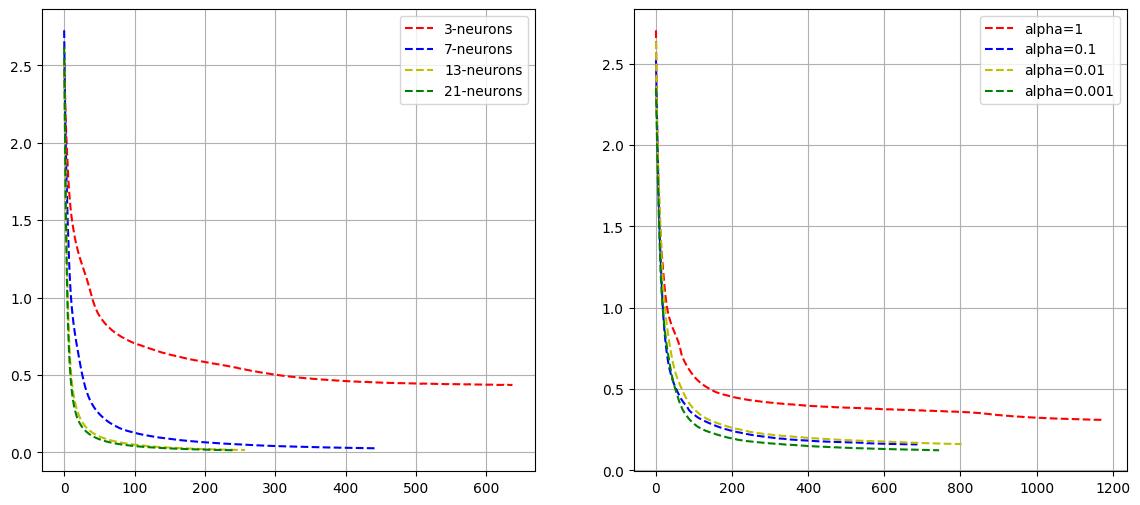

In [10]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].plot(clf_1.loss_curve_,'r--', label='3-neurons')
axs[0].plot(clf_2.loss_curve_,'b--',label='7-neurons')
axs[0].plot(clf_3.loss_curve_,'y--',label='13-neurons')
axs[0].plot(clf_4.loss_curve_,'g--',label='21-neurons')
axs[0].grid('True')
axs[0].legend()

axs[1].plot(clf_5.loss_curve_, 'r--' , label='alpha=1')
axs[1].plot(clf_6.loss_curve_, 'b--' , label='alpha=0.1')
axs[1].plot(clf_7.loss_curve_, 'y--' , label='alpha=0.01')
axs[1].plot(clf_8.loss_curve_, 'g--' , label='alpha=0.001')
axs[1].grid('True')
axs[1].legend()

# GridSearch
The brute-force solution to finding the optimal hyperparameters of a model is called Grid Search. It is an exhaustive search method that considers all possible combinations of hyperparameters within a specified range. As expected, it scales exponentially with the number of hyperparameters, but it is a sufficient approach if the search space is small. Other approaches exist, such as Bayesian optimization, which have been shown to obtain better results in less time. Read more about it here: https://arxiv.org/pdf/1807.02811.pdf.

In [11]:
# Perform a GridSearch over given hyperparameters - this cell will take a while to run
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
# ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

parameters = {'solver': ['sgd'], 
            'max_iter': [200,300],
            'alpha': 10.0 ** -np.arange(0, 3), 
            'hidden_layer_sizes':np.arange(10, 15)
            } 

# clf = GridSearchCV(MLPClassifier(), parameters)
# clf.fit(trainData,trainLabel)
# print(clf.best_params_)
# print(clf.best_score_)


## TASK: Approximate a Function With a Neural Network

Neural networks can also serve as universal continuous function approximators (to within epsilon accuracy), as mentioned in lecture. But why is this the case? Very loosely, the idea is similar to that of computing the area of the curve using the limit of the Riemann sum. If we could approximate these rectangles to arbitrary precision, we could make a case for approximating any (smooth) function to arbitrary precision. The next cell plots a rectangle formed using a combination of 4 $relus$.

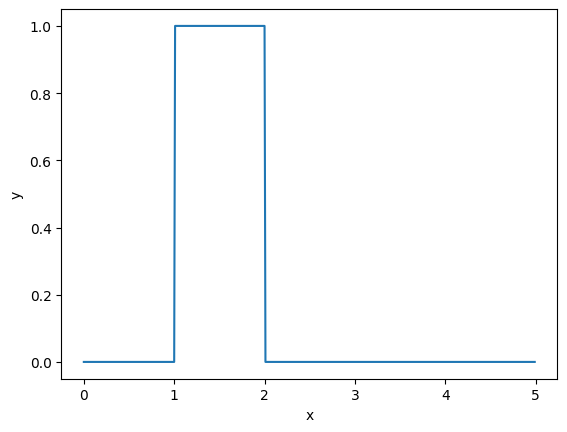

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-values
x = np.arange(0, 5, 0.01)

# Define the function
y = 100*(np.maximum(0, x-1) - np.maximum(0, x-1.01) - (np.maximum(0, x-2) - np.maximum(0, x-2.01)))

# Plot the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Can you come up with a model that can approximate the following function well? Below is some starter code.

$$y(x) = \sin(2\pi x ) + \sin(5\pi x)$$

In [13]:
def y(x):
    return (np.sin(2*np.pi*x) + np.sin(5*np.pi*x))

In [14]:
import numpy as np
x_vals = np.arange(-1,1,0.002)
y_vals = y(x_vals)

In [15]:
# y_max = y_vals.max()
# y_vals /= y_max

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)

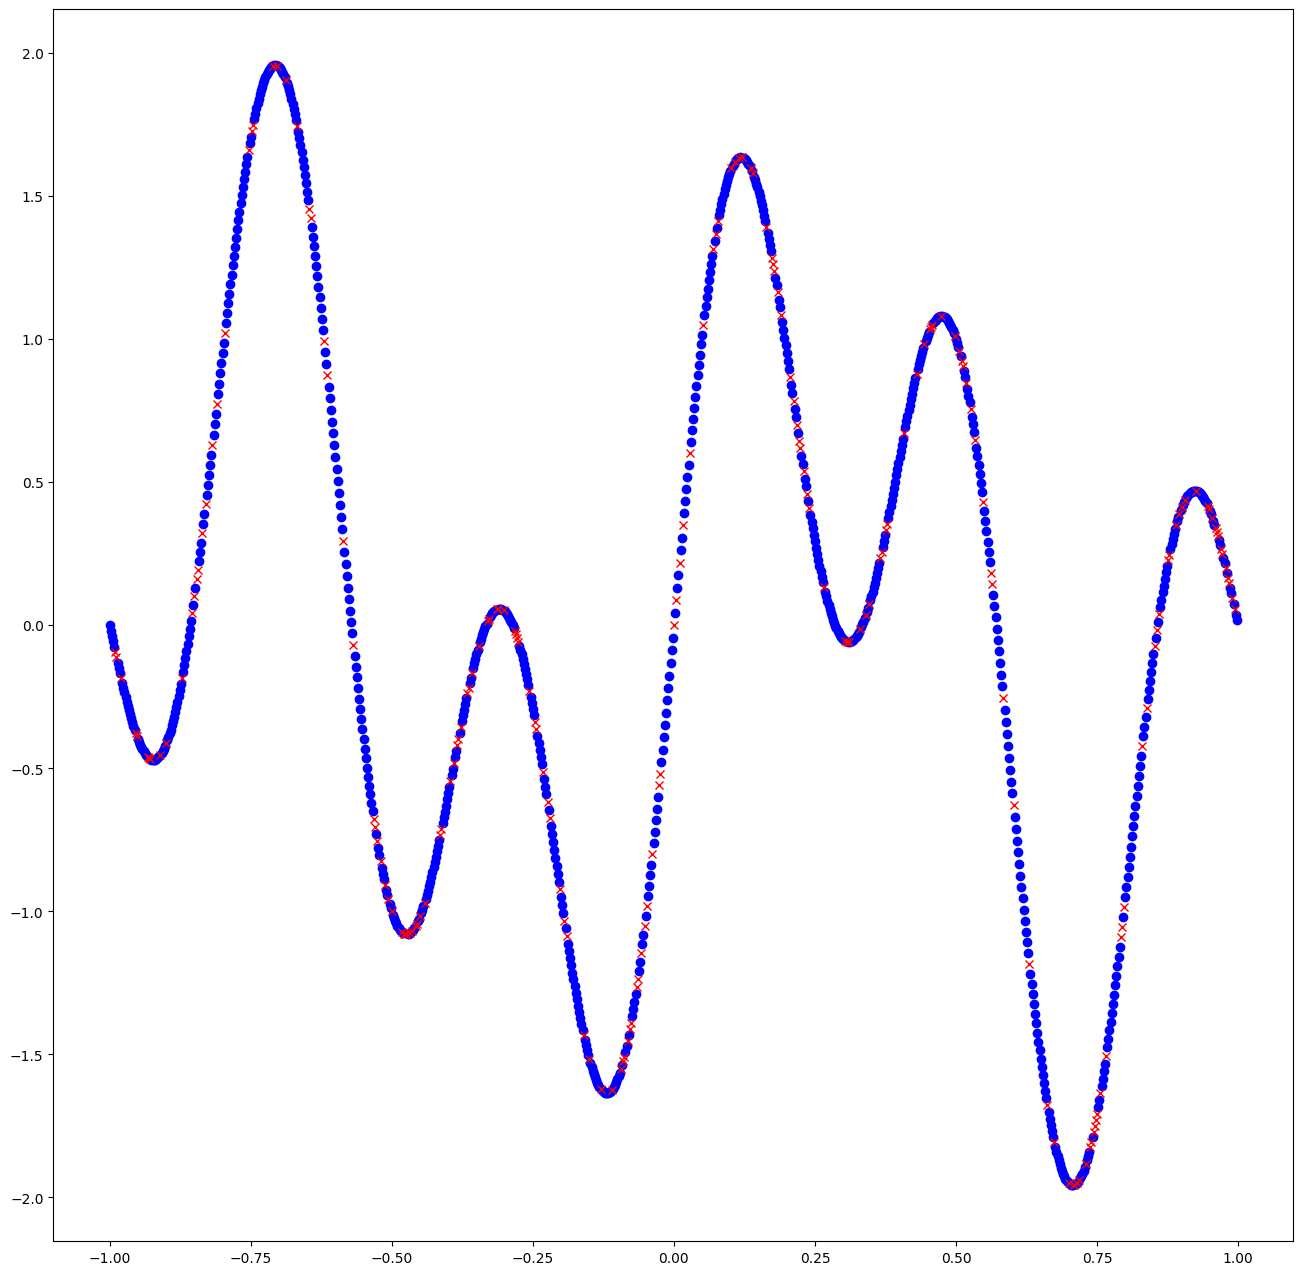

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize= (16,16))
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'rx')
plt.show()

0.3682164942862577


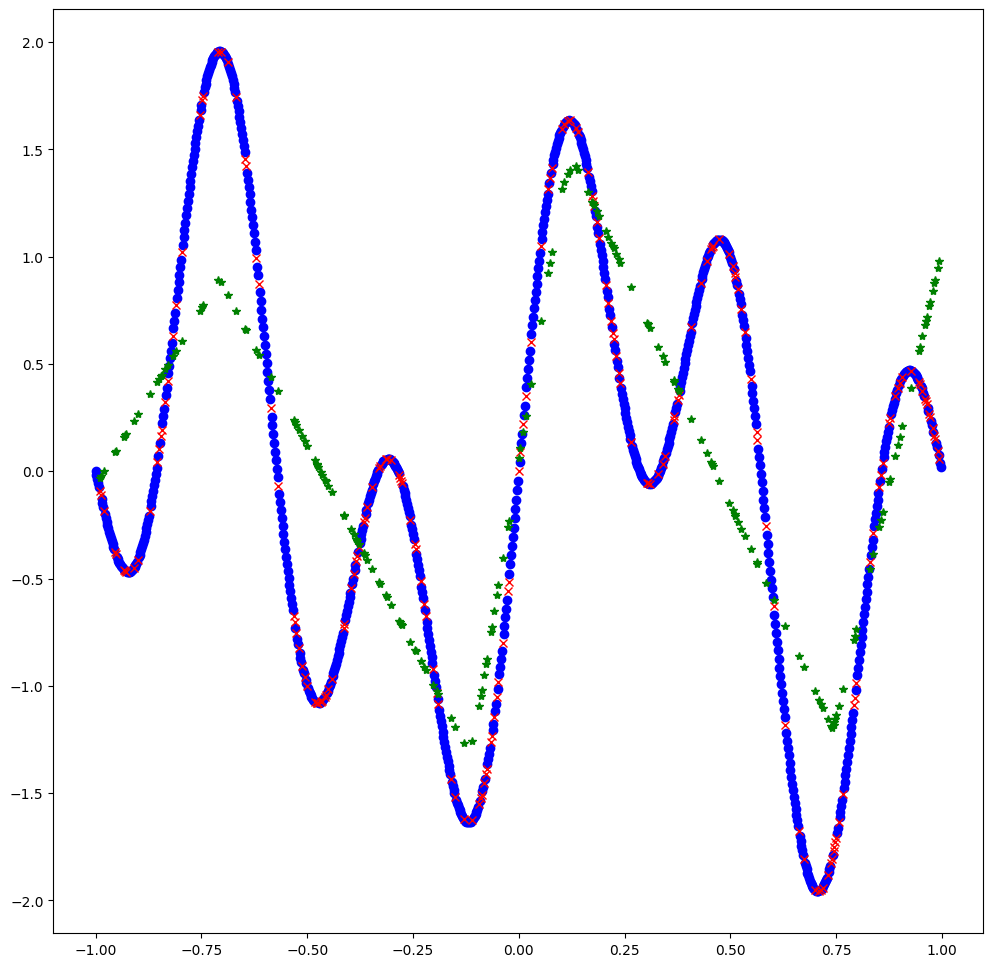

In [18]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp = MLPRegressor(
    hidden_layer_sizes=[50],
    activation='relu',
    max_iter=5000,
    alpha=0.001,
    batch_size=32
)

mlp.fit(x_train,y_train)
predictions = mlp.predict(x_test)
mse = mean_squared_error(predictions, y_test)
print(mse)
plt.figure(figsize= (12,12))
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'rx')
plt.plot(x_test, predictions, 'g*')
plt.show()